In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import train_test_split

In [51]:
import statsmodels.api as sm

In [ ]:
sm.

In [31]:
def clean_data(filepath):
    data = pd.read_csv(filepath)
    
    #converting the disposable income to a standard format
    mapping = {
    'Less than 1000': 800,
    '1000 - 2000': 1600,
    '2000 - 3000': 2500,
    'More than 3000': 4000
    }
   

    data['income'] = data['Disposable Income/Allowance'].map(mapping)
        
    #create our target column using Do you have any Life or Non-Life Insurance Policy column
    target_mapping = {
    'Yes': 1,
    'No': 0}    

    data['target'] = data['Do you have any Life or Non-Life Insurance Policy'].map(target_mapping)
    
    data['target'] = data['target'].fillna(0)
    
    data['target'] = data['target'].astype(int)
    
    # remove unimportant columns from the dataset
    leaky_cols = ['Timestamp','Username','Gender','Disposable Income/Allowance','Do you have any Life or Non-Life Insurance Policy','Occupational Status','Educational Level', 'Did this experience influence your perception and/or decision to buy insurance policies.']
    
    data = data.drop(columns = leaky_cols)

    return data

In [32]:
data = clean_data('data.csv/Insurance Penetration.csv')

In [2]:
df = pd.read_csv('data.csv/new_clean_data.csv')

In [3]:
df.head(10)

,income,educ_bag,occ_status,state_req,pers_ben,tech_ad,rel_aff,edu_level,decision_influence,experi_impli,target
0,800.0,1,0,1,1,0,0,1,0,1,0
1,800.0,1,0,1,1,1,1,1,0,1,0
2,800.0,0,2,1,1,1,1,1,0,2,0
3,1600.0,1,2,1,1,1,1,1,0,0,0
4,800.0,1,0,0,0,1,0,0,1,1,0
5,800.0,1,0,1,1,1,1,1,0,1,0
6,800.0,1,0,1,1,1,1,1,1,2,0
7,1600.0,1,2,1,1,1,1,1,1,1,1
8,800.0,1,0,1,1,1,0,1,0,1,0
9,2500.0,1,2,1,1,1,0,1,0,1,0


In [33]:
data.head(10)

,Educational Background,Statutory Requirements,Personal Benefits,Technological Advancement,Religious Beliefs / Affiliations,What is your past or current experience with insurance companies.,income,target
0,Tertiary,Yes,Yes,No,No,Neutral,800,0
1,Tertiary,Yes,Yes,Yes,Yes,Neutral,800,0
2,Secondary,Yes,Yes,Yes,Yes,Good,800,0
3,Tertiary,Yes,Yes,Yes,Yes,Bad,1600,0
4,Tertiary,No,No,Yes,No,Neutral,800,0
5,Tertiary,Yes,Yes,Yes,Yes,Neutral,800,0
6,Tertiary,Yes,Yes,Yes,Yes,Good,800,0
7,Tertiary,Yes,Yes,Yes,Yes,Neutral,1600,1
8,Tertiary,Yes,Yes,Yes,No,Neutral,800,0
9,Tertiary,Yes,Yes,Yes,No,Neutral,2500,0


In [ ]:
data['Occupational Status']

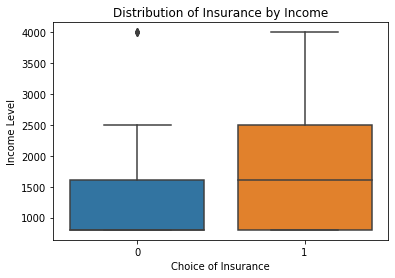

In [5]:
# Create boxplot
sns.boxplot(x = "target", y = "income", data = data)
# Label axes
plt.xlabel("Choice of Insurance")
plt.ylabel("Income Level")
plt.title("Distribution of Insurance by Income");

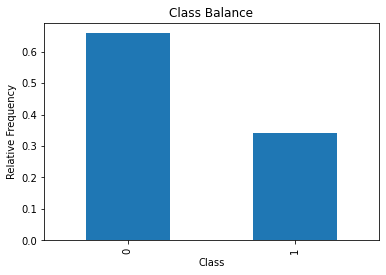

In [6]:
#class balance
data['target'].value_counts(normalize = True).plot(kind = "bar", xlabel = "Class", ylabel = "Relative Frequency", title = "Class Balance");

In [ ]:
# pivot table for Occupational Status
occupation_pivot = pd.pivot_table(data,index="Occupational Status",values = "target",aggfunc=np.mean).sort_values(by = "target")
occupation_pivot

In [4]:
y = df['target']

In [5]:
X = df.drop(columns = 'target')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (204, 10)
y_train shape: (204,)
X_test shape: (52, 10)
y_test shape: (52,)


In [7]:
y_train.value_counts(normalize = True).max()

0.5196078431372549

In [8]:
# baseline model
acc_baseline = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.52


In [9]:
# Build model
model = make_pipeline(OneHotEncoder(use_cat_names = True),LogisticRegression(max_iter = 1000))
# Fit model to training data
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [10]:
#evaluation 
model.score(X_test, y_test)

0.75

In [11]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.81
Test Accuracy: 0.75


In [12]:
#prediction probability
print(model.predict(X_train)[:5])

y_train_pred_proba = model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[1 0 0 1 0]
[[0.36463185 0.63536815]
 [0.96255514 0.03744486]
 [0.86459188 0.13540812]
 [0.40408187 0.59591813]
 [0.93507289 0.06492711]]


In [13]:
y_pred = model.predict(X_test)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68        20
           1       0.81      0.78      0.79        32

    accuracy                           0.75        52
   macro avg       0.74      0.74      0.74        52
weighted avg       0.75      0.75      0.75        52



In [14]:
model.named_steps['logisticregression'].intercept_

array([-5.41326582])

In [15]:
model.named_steps['logisticregression'].coef_

array([[ 4.68167969e-04, -8.67261540e-01,  1.15794521e+00,
         3.28404785e-01,  1.95633186e+00,  9.06785252e-01,
         7.19899998e-01,  6.71664422e-02,  9.33902463e-02,
         7.93340362e-01]])

In [16]:
# features that contributed to the model building
features = model.named_steps['onehotencoder'].get_feature_names_out()
importances = model.named_steps['logisticregression'].coef_[0]

# odds ratio
odds_ratios = pd.Series(np.exp(importances), index = features).sort_values()
odds_ratios.head()

educ_bag              0.420100
income                1.000468
edu_level             1.069473
decision_influence    1.097890
state_req             1.388751
dtype: float64

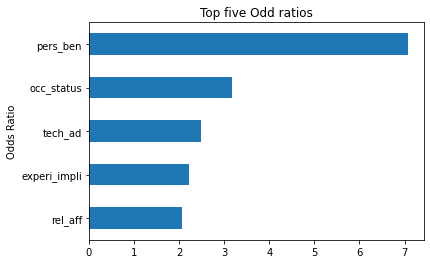

In [23]:
# Horizontal bar chart, five largest coefficients
odds_ratios.tail().plot(kind = "barh", xlabel = "Odds Ratio")
plt.title("Top five Odd ratios");
plt.savefig('top_five.png')

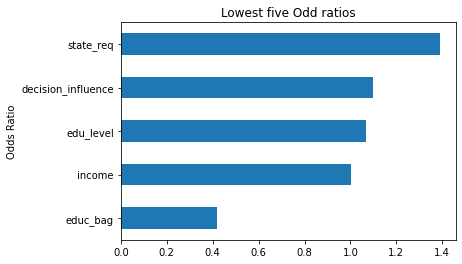

In [22]:
# Horizontal bar chart, five smallest coefficients
odds_ratios.head().plot(kind = "barh", xlabel = "Odds Ratio")
plt.title("Lowest five Odd ratios");
plt.savefig('lowest_five.png')